In [1]:
import sys
sys.path.append('./helpers')
import loadmat as lm
import glob
import os
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
files = glob.glob('Z:/giocomo/attialex/xcorrFlat/*.mat')
region_delays = dict()
region_delays_mean = []
region_delays_name = []

for iF in files:
    
    dat = lm.loadmat(iF)
    delays = dat['data']['delays']
    regions = dat['data']['regions']
    if isinstance(regions,str):
        regions =[regions]
        delays=[delays]
    for ii,reg in enumerate(regions):
        if not len(reg)==0:
            if len(delays[ii])==0:
                print('no data for {}'.format(reg))
            else:
                reg_this = str(reg)

                if reg_this in region_delays:
                    arr = region_delays[reg_this]
                    region_delays[reg_this]=np.vstack((arr,delays[ii]))                    
                else:
                    region_delays[reg_this]=delays[ii]
                valid_idx = (delays[ii][:,2]==1) & (delays[ii][:,4]==1) & (delays[ii][:,3]==100) & (delays[ii][:,5]==100)
                cc=np.corrcoef(delays[ii][valid_idx,1],delays[ii][valid_idx,0])
                region_delays_mean.append(cc[0,1])
                region_delays_name.append(reg_this)
            
    

no data for cc
no data for lfbst
no data for VISpm
no data for cVIIIn
no data for CTXpl
no data for BS


C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


no data for fxs
no data for ILM
no data for root
no data for RSPd
no data for hc
no data for CTXpl
no data for lfbst
no data for cVIIIn
no data for cc
no data for lfbst
no data for IIn
no data for VISpm
no data for root
no data for BS
no data for IIn
no data for cc
no data for lfbst
no data for fiber tracts
no data for BS
no data for mfbc
no data for fxs
no data for mfbc


C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


no data for MEC
no data for MEC


In [3]:
region_delays_mean = np.array(region_delays_mean)
reg = ['RSP' if el.startswith('RS') else el for el in region_delays_name]
region_delays_name=np.array(reg)

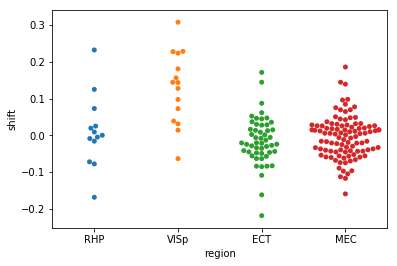

In [4]:
idx =  [True if (x == 'MEC' or x=='VISp' or x=='ECT' or x=='RHP') else False for x in region_delays_name]
#rr =  [x for i, x in enumerate(region_delays_name) if (x == 'MEC' or x=='VISp')]
dataset = pd.DataFrame({'region': region_delays_name[idx],'shift':region_delays_mean[idx]})
#ax1 = sns.violinplot(x="region", y="shift", data=dataset,inner=None)
ax2 = sns.swarmplot(x="region", y="shift", data=dataset, edgecolor="black")

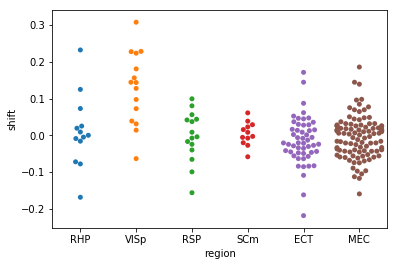

In [207]:
unique_elements, rev_idx,counts_elements = np.unique(region_delays_name, return_inverse=True,return_counts=True)
n=[]
for ii in range(len(unique_elements)):
    n.append(np.sum(np.logical_not(np.isnan(region_delays_mean[rev_idx==ii]))))
    
p={a:b for (a,b) in zip(unique_elements,n)}
idx =  [True if p[x]>10 else False for x in region_delays_name]
#rr =  [x for i, x in enumerate(region_delays_name) if (x == 'MEC' or x=='VISp')]
dataset = pd.DataFrame({'region': region_delays_name[idx],'shift':region_delays_mean[idx]})
#ax1 = sns.violinplot(x="region", y="shift", data=dataset,inner=None)
ax2 = sns.swarmplot(x="region", y="shift", data=dataset, edgecolor="black")
fig =ax2.get_figure()
fig.savefig('C:/temp/xcorr_population.png')

this goes through all files and calculates correlation between shift and speed difference, not sure about the difference between Flat2 and Flat... Flat3: filtered like all other xcorrs, as well as mean subtracted before xcorr

In [22]:
files = glob.glob('Z:/giocomo/attialex/xcorrFlat2/*.mat')
region_delays = dict()
region_delays_mean = []
region_delays_name = []

for iF in files:
    
    dat = lm.loadmat(iF)
    delays = dat['data']['delays']
    regions = dat['data']['regions']
    if isinstance(regions,str):
        regions =[regions]
        delays=[delays]
    for ii,reg in enumerate(regions):
        if not len(reg)==0:
            if len(delays[ii])==0:
                print('no data for {}'.format(reg))
            else:
                reg_this = str(reg)

                if reg_this in region_delays:
                    arr = region_delays[reg_this]
                    region_delays[reg_this]=np.vstack((arr,delays[ii]))                    
                else:
                    region_delays[reg_this]=delays[ii]
                valid_idx = (delays[ii][:,2]==1) & (delays[ii][:,4]==1) & (delays[ii][:,3]==100) & (delays[ii][:,5]==100)
                valid_idx = np.logical_and(valid_idx,np.logical_not(np.isnan(delays[ii][:,0])))

                cc=np.corrcoef(delays[ii][valid_idx,1],delays[ii][valid_idx,0])
                region_delays_mean.append(cc[0,1])
                region_delays_name.append(reg_this)

no data for cc
no data for lfbst
no data for VISpm
no data for cVIIIn
no data for CTXpl
no data for BS


C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


no data for fxs
no data for ILM
no data for root
no data for RSPd
no data for hc
no data for CTXpl
no data for lfbst
no data for cVIIIn
no data for cc
no data for lfbst
no data for IIn
no data for VISpm
no data for root
no data for BS
no data for IIn
no data for cc
no data for lfbst
no data for fiber tracts
no data for BS
no data for mfbc
no data for fxs
no data for mfbc
no data for MEC
no data for MEC


In [23]:
region_delays_mean = np.array(region_delays_mean)
reg = ['RSP' if el.startswith('RS') else el for el in region_delays_name]
region_delays_name=np.array(reg)

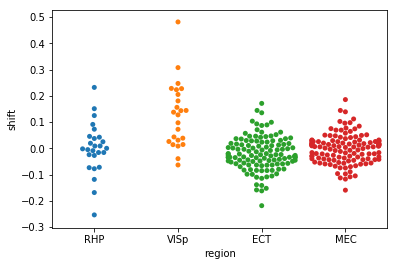

In [24]:
idx =  [True if (x == 'MEC' or x=='VISp' or x=='ECT' or x=='RHP') else False for x in region_delays_name]
#rr =  [x for i, x in enumerate(region_delays_name) if (x == 'MEC' or x=='VISp')]
dataset = pd.DataFrame({'region': region_delays_name[idx],'shift':region_delays_mean[idx]})
#ax1 = sns.violinplot(x="region", y="shift", data=dataset,inner=None)
ax2 = sns.swarmplot(x="region", y="shift", data=dataset, edgecolor="black")

# Spatial Maps filtered like everywhere else, xcorr on mean subtracted spatial maps, on whole track

In [44]:
files = glob.glob('Z:/giocomo/attialex/xcorrFlat3/*.mat')
region_delays = dict()
region_delays_mean = []
region_delays_slope = [];
region_delays_name = []

for iF in files:
    
    dat = lm.loadmat(iF)
    delays = dat['data_out']['delays']
    regions = dat['data_out']['regions']
    if isinstance(regions,str):
        regions =[regions]
        delays=[delays]
    for ii,reg in enumerate(regions):
        if not len(reg)==0:
            if len(delays[ii])==0:
                print('no data for {}'.format(reg))
            else:
                reg_this = str(reg)

                if reg_this in region_delays:
                    arr = region_delays[reg_this]
                    region_delays[reg_this]=np.vstack((arr,delays[ii]))                    
                else:
                    region_delays[reg_this]=delays[ii]
                valid_idx = (delays[ii][:,2]==1) & (delays[ii][:,4]==1) & (delays[ii][:,3]==100) & (delays[ii][:,5]==100)
                valid_idx = np.logical_and(valid_idx,np.logical_not(np.isnan(delays[ii][:,0])))
                cc=np.corrcoef(delays[ii][valid_idx,1],delays[ii][valid_idx,0])
                slp = np.polyfit(delays[ii][valid_idx,1],delays[ii][valid_idx,0],1)[0]
                region_delays_mean.append(cc[0,1])
                region_delays_name.append(reg_this)
                region_delays_slope.append(slp)

no data for cc
no data for lfbst
no data for CTXpl
no data for cVIIIn
no data for CTXpl
no data for BS
no data for fxs
no data for ILM
no data for root
no data for RSPd
no data for hc
no data for CTXpl
no data for lfbst
no data for cVIIIn
no data for cc
no data for lfbst
no data for IIn
no data for VISpm
no data for root
no data for BS
no data for IIn
no data for cc
no data for lfbst
no data for fiber tracts
no data for BS
no data for mfbc
no data for fxs
no data for mfbc


C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


TypeError: expected non-empty vector for x

In [19]:
region_delays_mean = np.array(region_delays_mean)
reg = ['RSP' if el.startswith('RS') else el for el in region_delays_name]
region_delays_name=np.array(reg)

In [20]:
cc

array([[1.        , 0.04673986],
       [0.04673986, 1.        ]])

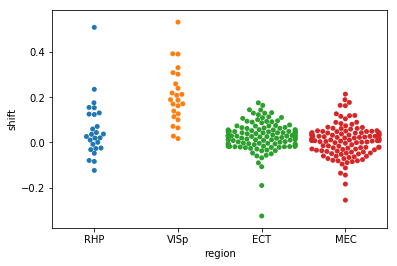

In [21]:
idx =  [True if (x == 'MEC' or x=='VISp' or x=='ECT' or x=='RHP') else False for x in region_delays_name]
#rr =  [x for i, x in enumerate(region_delays_name) if (x == 'MEC' or x=='VISp')]
dataset = pd.DataFrame({'region': region_delays_name[idx],'shift':region_delays_mean[idx]})
#ax1 = sns.violinplot(x="region", y="shift", data=dataset,inner=None)
ax2 = sns.swarmplot(x="region", y="shift", data=dataset, edgecolor="black")

In [ ]:
unique_elements, rev_idx,counts_elements = np.unique(region_delays_name, return_inverse=True,return_counts=True)
n=[]
for ii in range(len(unique_elements)):
    n.append(np.sum(np.logical_not(np.isnan(region_delays_mean[rev_idx==ii]))))
    
p={a:b for (a,b) in zip(unique_elements,n)}
idx =  [True if p[x]>10 else False for x in region_delays_name]
#rr =  [x for i, x in enumerate(region_delays_name) if (x == 'MEC' or x=='VISp')]
dataset = pd.DataFrame({'region': region_delays_name[idx],'shift':region_delays_mean[idx]})
#ax1 = sns.violinplot(x="region", y="shift", data=dataset,inner=None)
ax2 = sns.swarmplot(x="region", y="shift", data=dataset, edgecolor="black")
fig =ax2.get_figure()
fig.savefig('C:/temp/xcorr_population.png')

# Spatial Maps filtered like everywhere else, xcorr on mean subtracted spatial maps, only on track excerpt (60-140cm)

In [51]:
files = glob.glob('Z:/giocomo/attialex/xcorrFlat4/*.mat')
region_delays = dict()
region_delays_mean = []
region_delays_name = []
region_delays_slope = [];

for iF in files:
    
    dat = lm.loadmat(iF)
    delays = dat['data_out']['delays']
    regions = dat['data_out']['regions']
    if isinstance(regions,str):
        regions =[regions]
        delays=[delays]
    for ii,reg in enumerate(regions):
        if not len(reg)==0:
            if len(delays[ii])==0:
                print('no data for {}'.format(reg))
            else:
                reg_this = str(reg)

                if reg_this in region_delays:
                    arr = region_delays[reg_this]
                    region_delays[reg_this]=np.vstack((arr,delays[ii]))                    
                else:
                    region_delays[reg_this]=delays[ii]
                valid_idx = (delays[ii][:,2]==1) & (delays[ii][:,4]==1) & (delays[ii][:,3]==100) & (delays[ii][:,5]==100)
                valid_idx = np.logical_and(valid_idx,np.logical_not(np.isnan(delays[ii][:,0])))
                if valid_idx.sum()>4:
                    try:
                        cc=np.corrcoef(delays[ii][valid_idx,1],delays[ii][valid_idx,0])
                        slope=np.polyfit(delays[ii][valid_idx,1],delays[ii][valid_idx,0],1)[0]
                        region_delays_mean.append(cc[0,1])
                        region_delays_slope.append(slope)
                        region_delays_name.append(reg_this)
                    except:
                        print('fit failed')
                        

no data for cc
no data for lfbst
no data for CTXpl
no data for cVIIIn
no data for CTXpl
no data for BS
no data for fxs
no data for ILM
no data for root
no data for RSPd
no data for hc
no data for CTXpl
no data for lfbst
no data for cVIIIn
no data for cc
no data for lfbst
no data for IIn
no data for VISpm
no data for root
no data for BS
no data for IIn
no data for cc
no data for lfbst
no data for fiber tracts
no data for BS
no data for mfbc
no data for fxs
no data for mfbc
fit failed
fit failed
no data for MEC
no data for MEC


In [55]:
region_delays_mean = np.array(region_delays_mean)
region_delays_slope = np.array(region_delays_slope)
reg = ['RSP' if el.startswith('RS') else el for el in region_delays_name]
region_delays_name=np.array(reg)


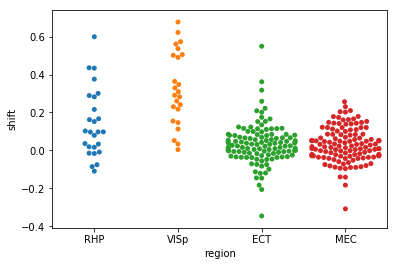

In [60]:
idx =  [True if (x == 'MEC' or x=='VISp' or x=='ECT' or x=='RHP') else False for x in region_delays_name]
#rr =  [x for i, x in enumerate(region_delays_name) if (x == 'MEC' or x=='VISp')]
dataset = pd.DataFrame({'region': region_delays_name[idx],'shift':region_delays_mean[idx],'slope':region_delays_slope[idx]})
#ax1 = sns.violinplot(x="region", y="shift", data=dataset,inner=None)
ax2 = sns.swarmplot(x="region", y="shift", data=dataset, edgecolor="black")

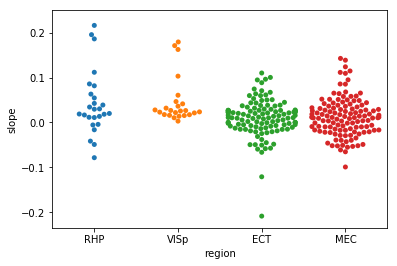

In [61]:
ax2 = sns.swarmplot(x="region", y="slope", data=dataset, edgecolor="black")